Name: Pradeepika Ravala
Project: Project 4
"Retail Analysis with Walmart Data"

In [1]:
#Importing supporting libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from scipy import stats
from datetime import date, datetime 

In [2]:
wal_sales = pd.read_csv("Walmart_Store_sales.csv", parse_dates=True)

In [3]:
wal_sales.shape

(6435, 8)

In [4]:
#Information on the data available in the table about all the columns
wal_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#Checking for any missing values
wal_sales.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

OBSERVATION:
THERE ARE NO MISSING VALUES IN THE DATASET

In [6]:
#Checking the maximun values in the dataset
wal_sales.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

In [7]:
#creating a seperate dataframe for calculating sales maximumum, mean, standard deviation.
sales = pd.DataFrame(wal_sales.groupby('Store').agg({'Weekly_Sales':['sum','std','mean']}))
sales = sales.reset_index()
sales

Store  Weekly_Sales                             
                   sum            std          mean
0      1  2.224028e+08  155980.767761  1.555264e+06
1      2  2.753824e+08  237683.694682  1.925751e+06
2      3  5.758674e+07   46319.631557  4.027044e+05
3      4  2.995440e+08  266201.442297  2.094713e+06
4      5  4.547569e+07   37737.965745  3.180118e+05
5      6  2.237561e+08  212525.855862  1.564728e+06
6      7  8.159828e+07  112585.469220  5.706173e+05
7      8  1.299512e+08  106280.829881  9.087495e+05
8      9  7.778922e+07   69028.666585  5.439806e+05
9     10  2.716177e+08  302262.062504  1.899425e+06
10    11  1.939628e+08  165833.887863  1.356383e+06
11    12  1.442872e+08  139166.871880  1.009002e+06
12    13  2.865177e+08  265506.995776  2.003620e+06
13    14  2.889999e+08  317569.949476  2.020978e+06
14    15  8.913368e+07  120538.652043  6.233125e+05
15    16  7.425243e+07   85769.680133  5.192477e+05
16    17  1.277821e+08  112162.936087  8.935814e+05
17    18  1.551147e+08  176641.510839  1.084718e+06
18    19  2.066349e+08  191722.638730  1.444999e+06
19    20  3.013978e+08  275900.562742  2.107677e+06
20    21  1.081179e+08  128752.812853  7.560691e+05
21    22  1.470756e+08  161251.350631  1.028501e+06
22    23  1.987506e+08  249788.038068  1.389864e+06
23    24  1.940160e+08  167745.677567  1.356755e+06
24    25  1.010612e+08  112976.788600  7.067215e+05
25    26  1.434164e+08  110431.288141  1.002912e+06
26    27  2.538559e+08  239930.135688  1.775216e+06
27    28  1.892637e+08  181758.967539  1.323522e+06
28    29  7.714155e+07   99120.136596  5.394514e+05
29    30  6.271689e+07   22809.665590  4.385796e+05
30    31  1.996139e+08  125855.942933  1.395901e+06
31    32  1.668192e+08  138017.252087  1.166568e+06
32    33  3.716022e+07   24132.927322  2.598617e+05
33    34  1.382498e+08  104630.164676  9.667816e+05
34    35  1.315207e+08  211243.457791  9.197250e+05
35    36  5.341221e+07   60725.173579  3.735120e+05
36    37  7.420274e+07   21837.461190  5.189003e+05
37    38  5.515963e+07   42768.169450  3.857317e+05
38    39  2.074455e+08  217466.454833  1.450668e+06
39    40  1.378703e+08  119002.112858  9.641280e+05
40    41  1.813419e+08  187907.162766  1.268125e+06
41    42  7.956575e+07   50262.925530  5.564039e+05
42    43  9.056544e+07   40598.413260  6.333247e+05
43    44  4.329309e+07   24762.832015  3.027489e+05
44    45  1.123953e+08  130168.526635  7.859814e+05

In [8]:
#First question
# Which store has maximum sales?
#First we groupby the stores and 
maxsales = sales.loc[sales[('Weekly_Sales','sum')]==sales[('Weekly_Sales','sum')].max()]
print("The store with maximum sales is:\n",maxsales)

The store with maximum sales is:
    Store  Weekly_Sales                             
                   sum            std          mean
19    20  3.013978e+08  275900.562742  2.107677e+06


OBSERVATIONS:
#First question
# Which store has maximum sales?
Store Number 20 has maximum sales in comparison to other stores.

In [9]:
#Second Question
#Which store has maximum standard deviation i.e., the sales vary a lot.
#Calculating coefficient of variation
maxstd = sales.loc[sales[('Weekly_Sales','std')]==sales[('Weekly_Sales','std')].max()]
print("The store with maximum standard deviation in sales is:\n",maxstd)
sales['coeff_var']=(sales[('Weekly_Sales','std')]/sales[('Weekly_Sales','mean')])*100
print('\n\n--------------------------------\n\n',sales.sort_values([('Weekly_Sales','std')],ascending=False))

The store with maximum standard deviation in sales is:
    Store  Weekly_Sales                             
                   sum            std          mean
13    14  2.889999e+08  317569.949476  2.020978e+06


--------------------------------

    Store  Weekly_Sales                               coeff_var
                   sum            std          mean           
13    14  2.889999e+08  317569.949476  2.020978e+06  15.713674
9     10  2.716177e+08  302262.062504  1.899425e+06  15.913349
19    20  3.013978e+08  275900.562742  2.107677e+06  13.090269
3      4  2.995440e+08  266201.442297  2.094713e+06  12.708254
12    13  2.865177e+08  265506.995776  2.003620e+06  13.251363
22    23  1.987506e+08  249788.038068  1.389864e+06  17.972115
26    27  2.538559e+08  239930.135688  1.775216e+06  13.515544
1      2  2.753824e+08  237683.694682  1.925751e+06  12.342388
38    39  2.074455e+08  217466.454833  1.450668e+06  14.990779
5      6  2.237561e+08  212525.855862  1.564728e+06  13.58

OBSERVATIONS:

#Second Question
#Which store has maximum standard deviation i.e., the sales vary a lot.?
#Calculating coefficient of variation?


Store Number 14 has maximum standard deviation of sales in comparison to other stores.

The coefficient of variation is high for store 10

In [10]:
#Converting the dates into quarter and monthly data to enable the exploratory functions
wal_sales['Date']=pd.to_datetime(wal_sales['Date'],format="%d-%m-%Y")
wal_sales['Quarter'] = pd.PeriodIndex(wal_sales.Date,freq='Q')
wal_sales['Monthly'] = pd.PeriodIndex(wal_sales.Date,freq='M')
wal_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Monthly
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q1,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q1,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q1,2010-03


In [11]:
wal_sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Quarter', 'Monthly'],
      dtype='object')

In [12]:
Quarterly = pd.DataFrame(wal_sales.groupby(['Quarter','Store']).agg({'Weekly_Sales':['sum']}))
Quarterly.head()

Weekly_Sales
                       sum
Quarter Store             
2010Q1  1      12178638.08
        2      15942113.37
        3       3245878.82
        4      15824390.55
        5       2343866.68

In [13]:
q2_2012_data = wal_sales[wal_sales['Quarter']=='2012Q2']
q3_2012_data = wal_sales[wal_sales['Quarter']=='2012Q3']

q2_2012 = pd.DataFrame(q2_2012_data.groupby('Store')['Weekly_Sales'].sum())
q2_2012.rename(columns={'Weekly_Sales':'Q2_2012_Sales'},inplace=True)
q3_2012 = pd.DataFrame(q3_2012_data.groupby('Store')['Weekly_Sales'].sum())
q3_2012.rename(columns={'Weekly_Sales':'Q3_2012_Sales'},inplace=True)

growth_2012 = q2_2012.merge(q3_2012,how='inner',on='Store')
growth_2012.head()

#To calculate the growth rate we need a table with Q2'2012 data as well as Q3'2012 data

,Q2_2012_Sales,Q3_2012_Sales
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99


In [14]:
#Question 3:
#Which store/s has good quarterly growth rate in Q3’2012
#Growthrate Q3 quarterly = ((q3 2012 sales - q2 2012 sales)/ q2 2012 sales)*100

growth_2012['Growthrate']=round((((growth_2012['Q3_2012_Sales']-growth_2012['Q2_2012_Sales'])/growth_2012['Q2_2012_Sales'])*100),2)
growth_2012.sort_values('Growthrate',ascending=False)
highgrowth = growth_2012.loc[growth_2012['Growthrate']==growth_2012['Growthrate'].max()]
print("The store with highest growthrate for Q3 2012 is:\n\n", highgrowth)

The store with highest growthrate for Q3 2012 is:

        Q2_2012_Sales  Q3_2012_Sales  Growthrate
Store                                          
7         7290859.27     8262787.39       13.33


OBSERVATION:

#Question 3:
#Which store/s has good quarterly growth rate in Q3’2012
#Growthrate Q3 quarterly = ((q3 2012 sales - q2 2012 sales)/ q2 2012 sales)*100


    The store with highest growthrate for Q3 2012 is 7

In [15]:
#Question 4
#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
mean_hol_sales = wal_sales.groupby('Holiday_Flag')['Weekly_Sales'].mean()
mean_hol_sales

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [16]:
#creating time stamp for holidays
# SB=superbowl season for 4 years; LD:labourday; TG=thanksgiving;CH=christmas
#1-2010,2-2011,3-2012,4-2013

Holiday_sales = wal_sales[wal_sales['Holiday_Flag'] == 1]
Nonholiday_sales =wal_sales[wal_sales['Holiday_Flag'] == 0]

SB1=pd.Timestamp(date(2010,2,12))
SB2=pd.Timestamp(date(2011,2,11))
SB3=pd.Timestamp(date(2012,2,10))
SB4=pd.Timestamp(date(2013,2,8))

LD1=pd.Timestamp(date(2010,9,10))
LD2=pd.Timestamp(date(2011,9,9))
LD3=pd.Timestamp(date(2012,9,7))
LD4=pd.Timestamp(date(2013,9,6))

TG1=pd.Timestamp(date(2010,11,26))
TG2=pd.Timestamp(date(2011,11,25))
TG3=pd.Timestamp(date(2012,11,23))
TG4=pd.Timestamp(date(2013,11,29))

CH1 = pd.Timestamp(date(2010,12,31))
CH2 = pd.Timestamp(date(2011,12,30))
CH3 = pd.Timestamp(date(2012,12,28))
CH4 = pd.Timestamp(date(2013,12,27))

CH_mean_sales = wal_sales[(wal_sales.Date==CH1) | (wal_sales.Date==CH2) | (wal_sales.Date==CH3) | (wal_sales.Date==CH4)]
TG_mean_sales = wal_sales[(wal_sales.Date==TG1) | (wal_sales.Date==TG2) | (wal_sales.Date==TG3) | (wal_sales.Date==TG4)]
LD_mean_sales = wal_sales[(wal_sales.Date==LD1) | (wal_sales.Date==LD2) | (wal_sales.Date==LD3) | (wal_sales.Date==LD4)]
SB_mean_sales = wal_sales[(wal_sales.Date==SB1) | (wal_sales.Date==SB2) | (wal_sales.Date==SB3) | (wal_sales.Date==SB4)]

mean_sales = {'SuperBowl Mean Sales': round(SB_mean_sales['Weekly_Sales'].mean(),2),
              'Labour Day Mean Sales': round(LD_mean_sales['Weekly_Sales'].mean(),2),
              'Thanks Giving Mean Sales': round(TG_mean_sales['Weekly_Sales'].mean(),2),
              'Christmas Mean Sales': round(CH_mean_sales['Weekly_Sales'].mean(),2),
              'Non-Holiday Mean Sales': round(wal_sales[wal_sales.Holiday_Flag == 0]['Weekly_Sales'].mean(),2)}

for key, value in mean_sales.items():
    print(key, ' : ', value)

print('\n\n')



Nonholiday_sales_mean = Nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
Holiday_sales_sum = Holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

for wsales in Holiday_sales_sum.itertuples():
    for wsales1 in Nonholiday_sales_mean.itertuples():
        if wsales.Weekly_Sales > wsales1.Weekly_Sales:
            print("\n On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :{}".format(wsales.Date,wsales.Weekly_Sales))
        break;


SuperBowl Mean Sales  :  1079127.99
Labour Day Mean Sales  :  1042427.29
Thanks Giving Mean Sales  :  1471273.43
Christmas Mean Sales  :  960833.11
Non-Holiday Mean Sales  :  1041256.38




 On this Date 2010-02-12 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :48336677.63000002

 On this Date 2010-09-10 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :45634397.84

 On this Date 2010-11-26 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :65821003.23999999

 On this Date 2010-12-31 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :40432519.0

 On this Date 2011-02-11 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :47336192.79000002

 On this Date 2011-09-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :46763227.529999994

 On this Date 2011-11-25 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :66593605.25999998

 On this D

OBSERVATION:

#Question 4
#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


    
According to the above results, it is evident that Holidat sales are greater than non holiday sales mean

Text(0.5, 1.0, 'Monthly Sales of total stores')

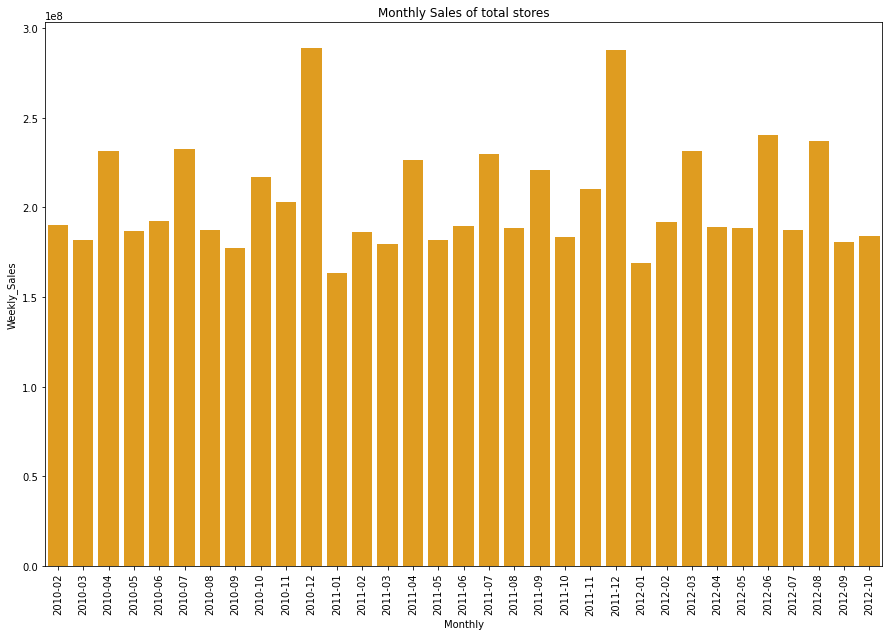

In [17]:
#Question 5
#Provide a monthly and semester view of sales in units and give insights
#Monthly sales view
monthly = wal_sales.groupby('Monthly')['Weekly_Sales'].sum()
monthly = monthly.reset_index()
mp.figure(figsize=(15,10))
barplt = sb.barplot(x=monthly['Monthly'], y=monthly['Weekly_Sales'], color='orange')
barplt.set_xticklabels(barplt.get_xticklabels(), rotation=90)
mp.title('Monthly Sales of total stores')

OBSERVATION:

#Question 5
#Provide a monthly and semester view of sales in units and give insights


Monthly sales of December in every year is high in comparison to other months.
The Average sales per month is above average.

Text(0.5, 1.0, 'Quarterly Sales of total stores')

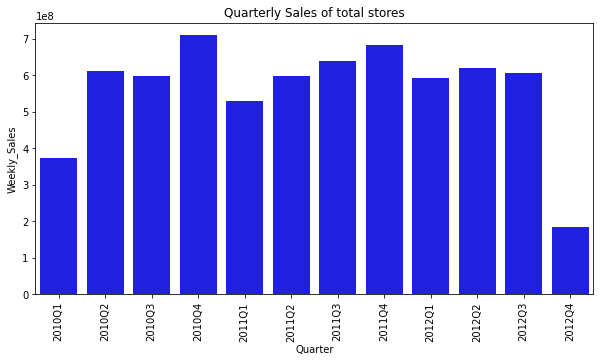

In [18]:
#Quarterly sales view
quarterly = wal_sales.groupby('Quarter')['Weekly_Sales'].sum()
quarterly = quarterly.reset_index()
mp.figure(figsize=(10,5))
barplt1 = sb.barplot(x=quarterly['Quarter'], y=quarterly['Weekly_Sales'], color='blue')
barplt1.set_xticklabels(barplt1.get_xticklabels(), rotation=90)
mp.title('Quarterly Sales of total stores')

OBSERVATION:
#Question 5
#Provide a monthly and semester view of sales in units and give insights


The highest Quarterly sales are recorded for Quarter 4 of 2010
The lowest is recorded for Quarter 4 of 2012

Text(0.5, 1.0, 'Semester Wise Sales')

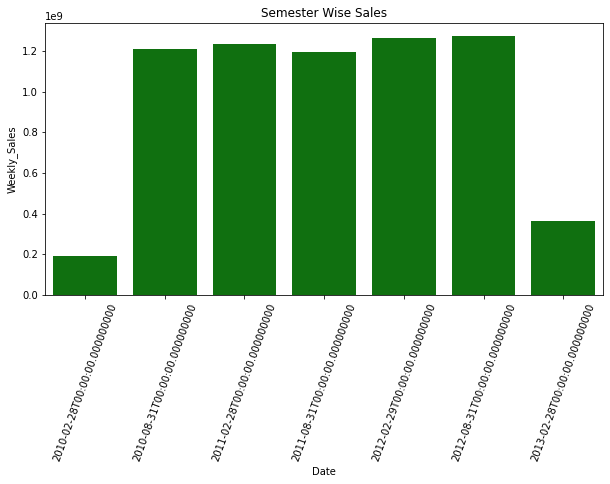

In [19]:
#semester sales data (considering semester is 6 months)
Semester = wal_sales.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
mp.figure(figsize=(10,5))
X = Semester['Date']
Y = Semester['Weekly_Sales']
barplot2 = sb.barplot(X,Y,color='green')
barplot2.set_xticklabels(barplot2.get_xticklabels(), rotation=70)
mp.title('Semester Wise Sales')

OBSERVATION:

#Question 5
#Provide a monthly and semester view of sales in units and give insights


The Semester sales are considered for half - a- year sales and as per the sales are approximately equal and the company is having a little bit consistency in maintaining the sales.

In [20]:
#Statistical Model
#For Store 1 – Build  prediction models to forecast demand
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
#(starting from the earliest date in order). 
#Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

#Restructuring date for one store

wal_sales1 = wal_sales.sort_values(['Store','Date'])
feature_date = wal_sales1[wal_sales1['Store'] ==1][['Store','Date']]
date_inc = wal_sales1[wal_sales['Store'] ==1][['Date']]
date_inc.index = date_inc.index+1
feature_date.Date = date_inc.index
feature_date.head()

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [21]:
#Creating new data for one store to analyze and predict the impact of one variable on other.
data_Store1 = wal_sales[wal_sales.Store==1]
data_Store1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.0,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420
std,0.0,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749
min,1.0,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000
50%,1.0,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000
75%,1.0,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000
max,1.0,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000


In [22]:
data_Store1.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Quarter          period[Q-DEC]
Monthly              period[M]
dtype: object

In [23]:
data_Store1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955
Holiday_Flag,NaN,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949
Temperature,NaN,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,NaN,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944
CPI,NaN,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471
Unemployment,NaN,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000


<AxesSubplot:>

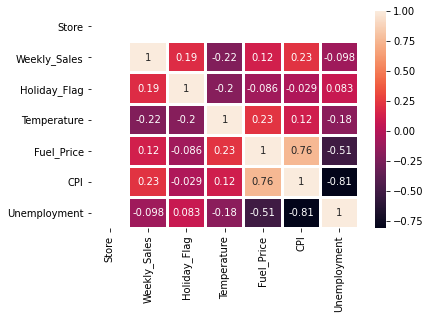

In [24]:
sb.heatmap(data_Store1.corr(),annot=True,linewidths=2)

OBSERVATION:

#Statistical Model
#For Store 1 – Build  prediction models to forecast demand
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
#(starting from the earliest date in order). 
#Hypothesize if CPI, unemployment, and fuel price have any impact on sales.



THE HEAT MAP GIVES US A CLEAR PICTURE THAT THERE IS NEGLIGIBLE ASSOCIATION WITH WEEKLY_SALES AMOUNT.

r2_score for CPI and Weekly Sales for Store 1 is : 0.04534274413478612
Actual Weekly sales on basis of CPI is [[1380020.27]
 [1532114.86]
 [1530761.43]
 [1802477.43]
 [1534849.64]]
Predicted Weekly sales on basis of CPI is [[1552231.06192619]
 [1541857.01608367]
 [1546911.28127639]
 [1581516.41434956]
 [1543958.65177958]]


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

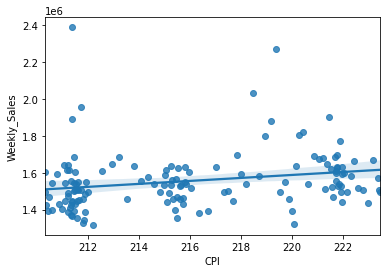

In [25]:
# Hypothesizing with respect to CPI

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
# creating target variable for performing statistical model
# As the question is to evaluate weekly_sales of stores in relation to other variables, the target is Weeklysales

target = data_Store1.Weekly_Sales.values
target = target.reshape(-1,1)

features_cpi = data_Store1.CPI.values
features_cpi=features_cpi.reshape(-1,1)
x_train_cpi,x_test_cpi, y_train_cpi, y_test_cpi = train_test_split(features_cpi, target, test_size = 0.3, random_state=30)
model_cpi = LinearRegression()
model_cpi.fit(x_train_cpi, y_train_cpi)
y_pred_cpi = model_cpi.predict(x_test_cpi)
model_cpi.score(x_test_cpi, y_test_cpi)
print("r2_score for CPI and Weekly Sales for Store 1 is :",r2_score(y_test_cpi,y_pred_cpi))
print("Actual Weekly sales on basis of CPI is {}".format(y_test_cpi[0:5]))
print("Predicted Weekly sales on basis of CPI is {}".format(y_pred_cpi[0:5]))
sb.regplot(x=data_Store1['CPI'], y=data_Store1['Weekly_Sales'])

r2_score for CPI and Weekly Sales for Store 1 is : -0.03268328885325067
Actual Weekly sales on basis of CPI is [[1380020.27]
 [1532114.86]
 [1530761.43]
 [1802477.43]
 [1534849.64]]
Predicted Weekly sales on basis of CPI is [[1529716.61649186]
 [1543419.72487629]
 [1529716.61649186]
 [1559765.575592  ]
 [1529716.61649186]]


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

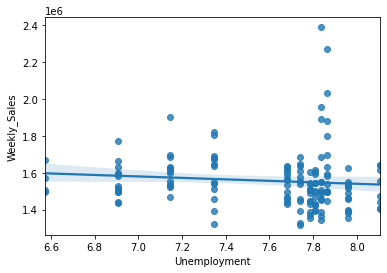

In [26]:
#With Umemployement

features_unemp = data_Store1.Unemployment.values
features_unemp=features_unemp.reshape(-1,1)
x_train_unemp,x_test_unemp, y_train_unemp, y_test_unemp = train_test_split(features_unemp, target, test_size = 0.3, random_state=30)
model_unemp = LinearRegression()
model_unemp.fit(x_train_unemp, y_train_unemp)
y_pred_unemp = model_unemp.predict(x_test_unemp)
model_unemp.score(x_test_unemp, y_test_unemp)
print("r2_score for CPI and Weekly Sales for Store 1 is :",r2_score(y_test_unemp,y_pred_unemp))
print("Actual Weekly sales on basis of CPI is {}".format(y_test_unemp[0:5]))
print("Predicted Weekly sales on basis of CPI is {}".format(y_pred_unemp[0:5]))
sb.regplot(x=data_Store1['Unemployment'], y=data_Store1['Weekly_Sales'])

r2_score for CPI and Weekly Sales for Store 1 is : -0.04308693658560059
Actual Weekly sales on basis of CPI is [[1380020.27]
 [1532114.86]
 [1530761.43]
 [1802477.43]
 [1534849.64]]
Predicted Weekly sales on basis of CPI is [[1564059.12635404]
 [1574415.23900861]
 [1569359.01930079]
 [1560525.86438954]
 [1564851.06438057]]


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

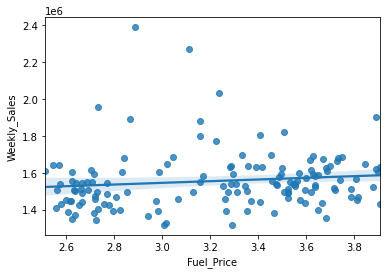

In [27]:
#With Fuel_Price

features_FP = data_Store1.Fuel_Price.values
features_FP=features_FP.reshape(-1,1)
x_train_FP,x_test_FP, y_train_FP, y_test_FP = train_test_split(features_FP, target, test_size = 0.3, random_state=30)
model_FP = LinearRegression()
model_FP.fit(x_train_FP, y_train_FP)
y_pred_FP = model_FP.predict(x_test_FP)
model_FP.score(x_test_FP, y_test_FP)
print("r2_score for CPI and Weekly Sales for Store 1 is :",r2_score(y_test_FP,y_pred_FP))
print("Actual Weekly sales on basis of CPI is {}".format(y_test_FP[0:5]))
print("Predicted Weekly sales on basis of CPI is {}".format(y_pred_FP[0:5]))
sb.regplot(x=data_Store1['Fuel_Price'], y=data_Store1['Weekly_Sales'])

OBSERVATIONS:

#Statistical Model
#For Store 1 – Build  prediction models to forecast demand
#Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
#(starting from the earliest date in order). 
#Hypothesize if CPI, unemployment, and fuel price have any impact on sales.


AS PER ABOVE SCATTER PLOTS AND R2 SCORE OF THE VARIABLES IN ASSOCIATION WITH WEEKLY SALES HAVE LITTLE TO NO EFFECT IN RESPECT OF STORE 1.
WE CAN REPEAT THE SAME FOR OTHER STORES AND FINDOUT THE POSSIBLE OUTCOMES.

In [28]:
#Change dates into days by creating new variable.
wal_sales['today']=date.today()
wal_sales['today']=pd.to_datetime(wal_sales['today'])
wal_sales['days'] = wal_sales['today']-wal_sales['Date']
wal_sales['day']=pd.to_datetime(wal_sales.Date).dt.day_name()
wal_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Monthly,today,days,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q1,2010-02,2020-10-06,3896 days,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q1,2010-02,2020-10-06,3889 days,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2010-02,2020-10-06,3882 days,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2010-02,2020-10-06,3875 days,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q1,2010-03,2020-10-06,3868 days,Friday


OBSERVATIONS:

#Change dates into days by creating new variable.


THE MAIN OBSERVATION AFTER LOOKING AT THE DATES IS THAT, THE WEEKLY SALES ARE RECORDED EVERY FRIDAY. THE VARIABLE IS APPENDED TO THE ALREADY EXISTING FILE FOR FURTHER ANALYSIS.